In [28]:
import pandas as pd
import neuralfoil as nf

# Load the coordinates from the .dat file
file_path = '/home/showvik/project MNO/Aerospace/coord_seligFmt/naca2412.dat'
df = pd.read_csv(file_path, sep='\s+', header=None, skiprows=1, names=['x', 'y'])

# Extract coordinates
coordinates = df[['x', 'y']].values

# Analyze the airfoil
aero = nf.get_aero_from_coordinates(
    coordinates=coordinates,
    alpha=5,      # Angle of attack in degrees
    Re=5e6,       # Reynolds number
    model_size="xlarge"
)

print(aero.keys())
print("CL:", aero['CL'])
print("CD:", aero['CD'])
print("CM:", aero['CM'])

dict_keys(['analysis_confidence', 'CL', 'CD', 'CM', 'Top_Xtr', 'Bot_Xtr', 'upper_bl_theta_0', 'upper_bl_theta_1', 'upper_bl_theta_2', 'upper_bl_theta_3', 'upper_bl_theta_4', 'upper_bl_theta_5', 'upper_bl_theta_6', 'upper_bl_theta_7', 'upper_bl_theta_8', 'upper_bl_theta_9', 'upper_bl_theta_10', 'upper_bl_theta_11', 'upper_bl_theta_12', 'upper_bl_theta_13', 'upper_bl_theta_14', 'upper_bl_theta_15', 'upper_bl_theta_16', 'upper_bl_theta_17', 'upper_bl_theta_18', 'upper_bl_theta_19', 'upper_bl_theta_20', 'upper_bl_theta_21', 'upper_bl_theta_22', 'upper_bl_theta_23', 'upper_bl_theta_24', 'upper_bl_theta_25', 'upper_bl_theta_26', 'upper_bl_theta_27', 'upper_bl_theta_28', 'upper_bl_theta_29', 'upper_bl_theta_30', 'upper_bl_theta_31', 'upper_bl_H_0', 'upper_bl_H_1', 'upper_bl_H_2', 'upper_bl_H_3', 'upper_bl_H_4', 'upper_bl_H_5', 'upper_bl_H_6', 'upper_bl_H_7', 'upper_bl_H_8', 'upper_bl_H_9', 'upper_bl_H_10', 'upper_bl_H_11', 'upper_bl_H_12', 'upper_bl_H_13', 'upper_bl_H_14', 'upper_bl_H_15', 'u

In [34]:
import os
import pandas as pd
import neuralfoil as nf

folder = '/home/showvik/project MNO/Aerospace/coord_seligFmt'
results = []

for file in os.listdir(folder):
    if file.endswith('.dat'):
        file_path = os.path.join(folder, file)
        with open(file_path, 'r') as f:
            airfoil_name = f.readline().strip()
        
        df = pd.read_csv(file_path, delim_whitespace=True, header=None, skiprows=1, usecols=[0, 1])
        df.columns = ['x', 'y']
        coordinates = df[['x', 'y']].values

        try:
            aero = nf.get_aero_from_coordinates(
                coordinates=coordinates,
                alpha=5,
                Re=5e6,
                model_size="xlarge"
            )
            results.append([
                airfoil_name,
                aero['CL'],
                aero['CD'],
                aero['CM'],
                aero['CL']/aero['CD']  # Lift-to-drag ratio
            ])
        except:
            print(f"Skipping {airfoil_name} due to NeuralFoil error")

# Save results
df_results = pd.DataFrame(results, columns=['Airfoil','CL','CD','CM','CL/CD'])
df_results = df_results.sort_values(by='CL/CD', ascending=False)

# Ensure the directory exists
os.makedirs('project_aero', exist_ok=True)
df_results.to_csv('project_aero/airfoil_analysis.csv', index=False)

print(df_results)


/tmp/ipykernel_16279/1452151190.py:14: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True, header=None, skiprows=1, usecols=[0, 1])
/tmp/ipykernel_16279/1452151190.py:14: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True, header=None, skiprows=1, usecols=[0, 1])
/tmp/ipykernel_16279/1452151190.py:14: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True, header=None, skiprows=1, usecols=[0, 1])
/tmp/ipykernel_16279/1452151190.py:14: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` in

Skipping # McDonnell Douglas (MDA) 30P-30N Coordinates due to NeuralFoil error


/tmp/ipykernel_16279/1452151190.py:14: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True, header=None, skiprows=1, usecols=[0, 1])
/tmp/ipykernel_16279/1452151190.py:14: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True, header=None, skiprows=1, usecols=[0, 1])
/tmp/ipykernel_16279/1452151190.py:14: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True, header=None, skiprows=1, usecols=[0, 1])
/tmp/ipykernel_16279/1452151190.py:14: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` in

Skipping S9104 due to NeuralFoil error


/tmp/ipykernel_16279/1452151190.py:14: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True, header=None, skiprows=1, usecols=[0, 1])
/tmp/ipykernel_16279/1452151190.py:14: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True, header=None, skiprows=1, usecols=[0, 1])
/tmp/ipykernel_16279/1452151190.py:14: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True, header=None, skiprows=1, usecols=[0, 1])
/tmp/ipykernel_16279/1452151190.py:14: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` in

Skipping S9104BTE due to NeuralFoil error
                                                Airfoil  \
238                                        FX 72-LS-160   
43                       WORTMANN FX 72-MS-150B AIRFOIL   
526                                     CH10 (smoothed)   
25                                          FX 73-170 A   
1333                     WORTMANN FX 72-MS-150A AIRFOIL   
...                                                 ...   
1272                        BOEING 707 .40 SPAN AIRFOIL   
456   RAF 6 AIRFOIL, 12%, LE rad. 0.012, TE rad. 0.0...   
1174                        BOEING 707 .19 SPAN AIRFOIL   
1032                                CAP 21   (TraCFoil)   
1607                                        NACA-1 COWL   

                         CL                      CD                       CM  \
238     [1.558907725215759]  [0.005526431878276889]    [-0.2114933469180608]   
43     [1.7730817108386794]  [0.006881332921586585]    [-0.2745993945760992]   
526    [1

In [36]:
alphas = [-5, 0, 5, 10, 15]
results = []

for file in os.listdir(folder):
    if file.endswith('.dat'):
        file_path = os.path.join(folder, file)
        airfoil_name = file_path.split('/')[-1].replace('.dat','')
        # Read .dat file manually to handle inconsistent columns
        with open(file_path, 'r') as f:
            lines = f.readlines()[1:]  # skip header
        data = []
        for line in lines:
            parts = line.strip().split()
            if len(parts) >= 2:
                try:
                    x, y = float(parts[0]), float(parts[1])
                    data.append([x, y])
                except ValueError:
                    continue
        df = pd.DataFrame(data, columns=['x', 'y'])
        coordinates = df[['x', 'y']].values

        for alpha in alphas:
            aero = nf.get_aero_from_coordinates(coordinates, alpha=alpha, Re=5e6, model_size="xlarge")
            results.append([airfoil_name, alpha, aero['CL'], aero['CD'], aero['CM'], aero['CL']/aero['CD']])

df_results = pd.DataFrame(results, columns=['Airfoil','Alpha','CL','CD','CM','CL/CD'])
df_results.to_csv('project_aero/airfoil_analysis_multi_alpha.csv', index=False)
print(df_results)


/home/showvik/mambaforge/envs/my_ai_env/lib/python3.10/site-packages/aerosandbox/numpy/surrogate_model_tools.py:250: RuntimeWarning: overflow encountered in exp
  return x / (1 + _np.exp(-beta * x))
/home/showvik/mambaforge/envs/my_ai_env/lib/python3.10/site-packages/neuralfoil/main.py:292: RuntimeWarning: overflow encountered in exp
  CD = np.exp((y_fused[:, 2] - 2) * 2)
/home/showvik/mambaforge/envs/my_ai_env/lib/python3.10/site-packages/neuralfoil/main.py:300: RuntimeWarning: overflow encountered in power
  upper_theta = ((10 ** y_fused[:, 6 : 6 + Data.N]) - 0.1) / (
/home/showvik/mambaforge/envs/my_ai_env/lib/python3.10/site-packages/neuralfoil/main.py:303: RuntimeWarning: overflow encountered in exp
  upper_H = 2.6 * np.exp(y_fused[:, 6 + Data.N : 6 + Data.N * 2])
/home/showvik/mambaforge/envs/my_ai_env/lib/python3.10/site-packages/neuralfoil/main.py:305: RuntimeWarning: overflow encountered in power
  lower_theta = ((10 ** y_fused[:, 6 + Data.N * 3 : 6 + Data.N * 4]) - 0.1) / (
/

      Airfoil  Alpha                      CL                      CD  \
0     sc20402     -5  [-0.44339583807879634]  [0.034962796603388344]   
1     sc20402      0   [0.15403553254236868]   [0.00501829082884572]   
2     sc20402      5    [0.6858293538394706]   [0.05683423991298337]   
3     sc20402     10    [0.8510761070052485]   [0.14776153380966967]   
4     sc20402     15    [0.9788233739115348]    [0.2272499811187068]   
...       ...    ...                     ...                     ...   
8230     mh25     -5   [-0.3324391552650043]  [0.006564641486019204]   
8231     mh25      0   [0.16086943106912566]  [0.003469674292472719]   
8232     mh25      5    [0.6497713618353025]   [0.00667749434142644]   
8233     mh25     10    [1.1359538534861717]  [0.011257238961312655]   
8234     mh25     15    [1.5097909210881157]  [0.020815563936438356]   

                           CM                  CL/CD  
0     [-0.027370907494356684]  [-12.681932830162264]  
1       [-0.0367596792709

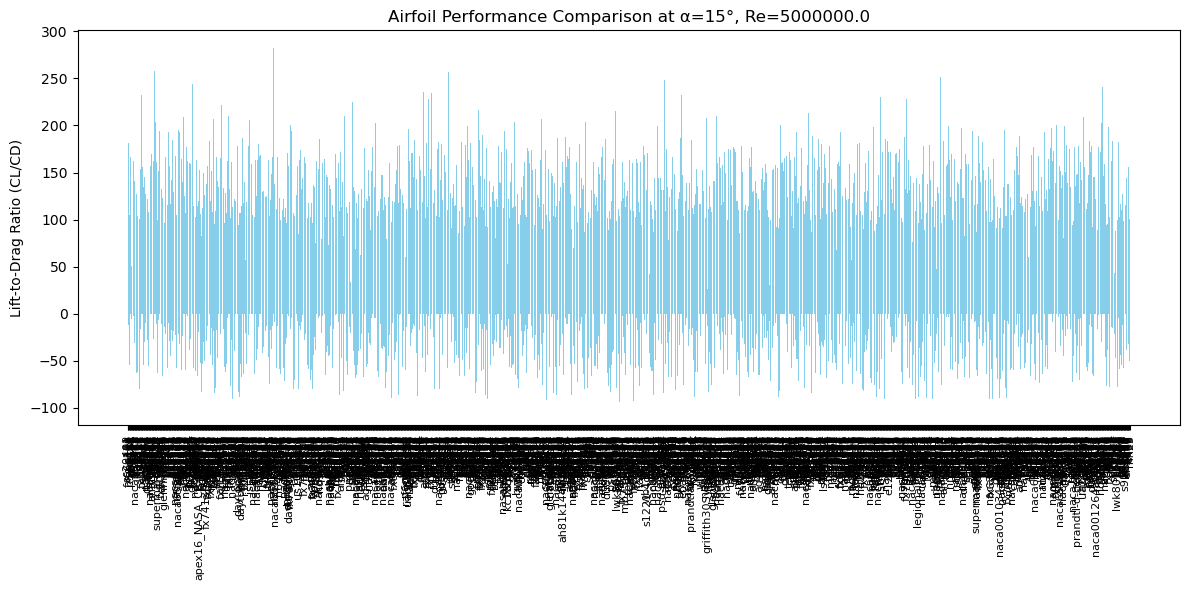

In [42]:
# Convert 'CL/CD' column from array to float
df_results['CL/CD'] = df_results['CL/CD'].apply(lambda x: float(x[0]) if isinstance(x, (list, np.ndarray)) else float(x))

plt.figure(figsize=(12,6))
plt.bar(df_results['Airfoil'], df_results['CL/CD'], color='skyblue')
plt.xticks(rotation=90, fontsize=8)
plt.ylabel("Lift-to-Drag Ratio (CL/CD)")
plt.title(f"Airfoil Performance Comparison at α={alpha}°, Re={5e6}")
plt.tight_layout()
plt.show()


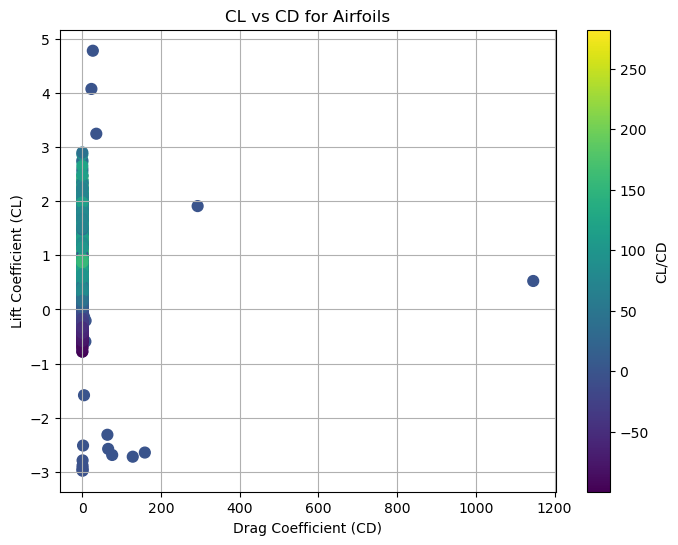

In [43]:
plt.figure(figsize=(8,6))
plt.scatter(df_results['CD'], df_results['CL'], c=df_results['CL/CD'], cmap='viridis', s=60)
plt.colorbar(label='CL/CD')
plt.xlabel("Drag Coefficient (CD)")
plt.ylabel("Lift Coefficient (CL)")
plt.title("CL vs CD for Airfoils")
plt.grid(True)
plt.show()

In [44]:

import os
import pandas as pd
import neuralfoil as nf
import plotly.express as px

# ================================
# 2️⃣ Setup paths and parameters
# ================================
folder = "/home/showvik/project MNO/Aerospace/coord_seligFmt"
alpha = 5       # angle of attack in degrees
Re = 5e6        # Reynolds number
model_size = "xlarge"
results = []

# ================================
# 3️⃣ Loop through .dat files
# ================================
for file in os.listdir(folder):
    if file.endswith(".dat"):
        file_path = os.path.join(folder, file)

        with open(file_path, 'r') as f:
            airfoil_name = f.readline().strip()

        try:
            df = pd.read_csv(file_path, sep='\s+', header=None, skiprows=1, usecols=[0,1])
            coordinates = df.values
        except:
            print(f"Skipping {airfoil_name} due to read error")
            continue

        try:
            aero = nf.get_aero_from_coordinates(
                coordinates=coordinates,
                alpha=alpha,
                Re=Re,
                model_size=model_size
            )
            cl = aero['CL'][0] if isinstance(aero['CL'], list) else aero['CL']
            cd = aero['CD'][0] if isinstance(aero['CD'], list) else aero['CD']
            cm = aero['CM'][0] if isinstance(aero['CM'], list) else aero['CM']
            results.append([airfoil_name, cl, cd, cm, cl/cd])
        except:
            print(f"Skipping {airfoil_name} due to NeuralFoil error")
            continue

# ================================
# 4️⃣ Create DataFrame
# ================================
df_results = pd.DataFrame(results, columns=['Airfoil','CL','CD','CM','CL/CD'])
df_results.head()


Skipping # McDonnell Douglas (MDA) 30P-30N Coordinates due to NeuralFoil error


/home/showvik/mambaforge/envs/my_ai_env/lib/python3.10/site-packages/aerosandbox/numpy/surrogate_model_tools.py:250: RuntimeWarning: overflow encountered in exp
  return x / (1 + _np.exp(-beta * x))
/home/showvik/mambaforge/envs/my_ai_env/lib/python3.10/site-packages/neuralfoil/main.py:292: RuntimeWarning: overflow encountered in exp
  CD = np.exp((y_fused[:, 2] - 2) * 2)
/home/showvik/mambaforge/envs/my_ai_env/lib/python3.10/site-packages/neuralfoil/main.py:300: RuntimeWarning: overflow encountered in power
  upper_theta = ((10 ** y_fused[:, 6 : 6 + Data.N]) - 0.1) / (
/home/showvik/mambaforge/envs/my_ai_env/lib/python3.10/site-packages/neuralfoil/main.py:303: RuntimeWarning: overflow encountered in exp
  upper_H = 2.6 * np.exp(y_fused[:, 6 + Data.N : 6 + Data.N * 2])
/home/showvik/mambaforge/envs/my_ai_env/lib/python3.10/site-packages/neuralfoil/main.py:305: RuntimeWarning: overflow encountered in power
  lower_theta = ((10 ** y_fused[:, 6 + Data.N * 3 : 6 + Data.N * 4]) - 0.1) / (
/

Skipping S9104 due to NeuralFoil error
Skipping S9104BTE due to NeuralFoil error


,Airfoil,CL,CD,CM,CL/CD
0,NASA SC(2)-0402 AIRFOIL,[0.6858293538394706],[0.05683423991298337],[-0.035094632001863635],[12.067186169631483]
1,FX 66-S-171 AIRFOIL,[1.0525625462003991],[0.005799038514454719],[-0.10250956671330069],[181.50638999495783]
2,GOE 199 (L.F.G. 5406) AIRFOIL,[1.0588546117900623],[0.006720087213862212],[-0.08968926536759889],[157.56560563765518]
3,P-51D ROOT (BL17.5) AIRFOIL,[0.7626924500857831],[0.0075752381885031824],[-0.04849329596444842],[100.68230610138559]
4,EPPLER 407 AIRFOIL,[1.102800984156692],[0.009413098583061762],[-0.15225834927793136],[117.15600069684898]


In [47]:
# Convert columns containing arrays to float scalars
for col in ['CL', 'CD', 'CM', 'CL/CD']:
    df_results[col] = df_results[col].apply(lambda x: float(x[0]) if isinstance(x, (list, np.ndarray)) else float(x))

# Filter out rows with non-positive CL/CD values
df_plot = df_results[df_results['CL/CD'] > 0]

fig = px.scatter_3d(
    df_plot,
    x='CD', y='CL', z='CM',
    color='CL/CD',
    hover_name='Airfoil',
    size='CL/CD',
    color_continuous_scale='Viridis',
    title=f"Airfoil Aerodynamic Properties at α={alpha}°, Re={Re}"
)
fig.show()

In [48]:
import pandas as pd
import neuralfoil as nf
import numpy as np
import plotly.graph_objects as go

# Load coordinates
file_path = "/home/showvik/project MNO/Aerospace/coord_seligFmt/naca2412.dat"
df_coords = pd.read_csv(file_path, sep='\s+', header=None, skiprows=1, usecols=[0,1])
coordinates = df_coords.values

# Run NeuralFoil
aero = nf.get_aero_from_coordinates(
    coordinates=coordinates,
    alpha=5,
    Re=5e6,
    model_size="xlarge"
)

print("CL:", aero['CL'][0])
print("CD:", aero['CD'][0])
print("CM:", aero['CM'][0])

# Plot the airfoil in 3D (simple z-plane)
fig = go.Figure()
fig.add_trace(go.Scatter3d(
    x=coordinates[:,0], y=coordinates[:,1], z=np.zeros_like(coordinates[:,0]),
    mode='lines', line=dict(color='red', width=4), name='NACA 2412'
))
fig.show()


CL: 0.7965009227567149
CD: 0.006650602239347901
CM: -0.05149679103773722


In [50]:
!pip install pipreqs

  Using cached pipreqs-0.5.0-py3-none-any.whl.metadata (7.9 kB)
  Using cached docopt-0.6.2-py2.py3-none-any.whl
  Using cached ipython-8.12.3-py3-none-any.whl.metadata (5.7 kB)
  Using cached yarg-0.1.9-py2.py3-none-any.whl.metadata (4.6 kB)
  Using cached backcall-0.2.0-py2.py3-none-any.whl.metadata (2.0 kB)
Using cached pipreqs-0.5.0-py3-none-any.whl (33 kB)
Using cached ipython-8.12.3-py3-none-any.whl (798 kB)
Using cached yarg-0.1.9-py2.py3-none-any.whl (19 kB)
Using cached backcall-0.2.0-py2.py3-none-any.whl (11 kB)
  Attempting uninstall: ipython
    Found existing installation: ipython 8.37.0
    Uninstalling ipython-8.37.0:╺━━━━━━━━━━━━━━━ 3/5 [ipython]
      Successfully uninstalled ipython-8.37.00m━━━━━━━━━━━━━━━ 3/5 [ipython]
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5/5 [pipreqs]m3/5 [ipython]


In [53]:
!pip freeze > requirements.txt